In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import json

Load data

In [2]:
folders = [
    "2023-04-14-job-search-location-DC",
    "2023-04-14-job-search-location-USA",
]


def extract_jobs_results(file_path):
    with open(file_path) as f:
        data = json.load(f)
    return data["jobs_results"]

df = pd.DataFrame()
all_jobs_results = []
for folder in folders:
    for file in os.listdir(folder):
        if file.endswith(".json"):
            file_path = os.path.join(folder, file)
            try:
                jobs_results = extract_jobs_results(file_path)
                df_tmp = pd.DataFrame(jobs_results)
                df_tmp['keyword'] = file[:-7]
                df = pd.concat([df,df_tmp],ignore_index=True)
                all_jobs_results.extend(jobs_results)
            except:
                print("no job results found")

no job results found
no job results found


In [3]:
df.head()

,title,company_name,location,via,description,job_highlights,related_links,extensions,detected_extensions,job_id,keyword
0,Ethereum Blockchain Developer (Remote),Ex Populus,Anywhere,via Built In,Company Overview:\nEx Populus is a cutting-edg...,"[{'title': 'Qualifications', 'items': ['2-3 ye...",[{'link': 'https://www.google.com/search?hl=en...,"[Work from home, Full-time, No degree mentioned]","{'schedule_type': 'Full-time', 'work_from_home...",eyJqb2JfdGl0bGUiOiJFdGhlcmV1bSBCbG9ja2NoYWluIE...,block-chain
1,Blockchain Engineer,21.co,"New York, NY",via Greenhouse,We are seeking a highly motivated and skilled ...,"[{'title': 'Qualifications', 'items': ['Bachel...",[{'link': 'https://www.google.com/search?hl=en...,[Full-time],{'schedule_type': 'Full-time'},eyJqb2JfdGl0bGUiOiJCbG9ja2NoYWluIEVuZ2luZWVyIi...,block-chain
2,Blockchain Course Instructor,Blockchain Institute of Technology,Anywhere,via LinkedIn,"Are you a blockchain, cryptocurrency, NFT, Met...","[{'title': 'Qualifications', 'items': ['3+ yea...",[{'link': 'https://www.google.com/search?hl=en...,"[24 hours ago, Work from home, Contractor, No ...","{'posted_at': '24 hours ago', 'schedule_type':...",eyJqb2JfdGl0bGUiOiJCbG9ja2NoYWluIENvdXJzZSBJbn...,block-chain
3,Python based - Blockchain developer to join ex...,Upwork,Anywhere,via Upwork,Need someone to join our existing team to spee...,"[{'title': 'Qualifications', 'items': ['Candid...","[{'link': 'http://www.elance.com/', 'text': 'e...","[2 days ago, 10–30 an hour, Work from home, Co...","{'posted_at': '2 days ago', 'schedule_type': '...",eyJqb2JfdGl0bGUiOiJQeXRob24gYmFzZWQgLSBCbG9ja2...,block-chain
4,Blockchain DevOps Engineer (Remote),Telnyx,United States,via Startup Jobs,"About Telnyx\n\nAt Telnyx, we’re architecting ...","[{'title': 'Qualifications', 'items': ['You ar...","[{'link': 'http://telnyx.com/', 'text': 'telny...","[4 days ago, Full-time, No degree mentioned]","{'posted_at': '4 days ago', 'schedule_type': '...",eyJqb2JfdGl0bGUiOiJCbG9ja2NoYWluIERldk9wcyBFbm...,block-chain


From the 85 searches, we now have 823 job results in total. There are `title`, `location`, `description`, `job_highlights`, `extensions` and `detected_extensions` in the dataframe. And the `job_id` and `related_link` are not the ones we care about, so I will first remove them from the dataframe.

In [4]:
df.shape

(823, 11)

In [5]:
df.columns

Index(['title', 'company_name', 'location', 'via', 'description',
       'job_highlights', 'related_links', 'extensions', 'detected_extensions',
       'job_id', 'keyword'],
      dtype='object')

In [6]:
df_new = df[['title', 'company_name', 'location', 'via', 'description',
       'job_highlights', 'extensions', 'detected_extensions', 'keyword']]

First I want to look at the `via` column and see which platforms are helpful when we want to look for a job.

In [7]:
df_new['via'].apply(lambda x: x.startswith("via ")).sum()

823

In [8]:
df_new['platform'] = df_new['via'].apply(lambda x:x[4:])

/var/folders/fw/5y38398x4pgb4ks5np5s62tw0000gn/T/ipykernel_23220/2299690099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['platform'] = df_new['via'].apply(lambda x:x[4:])


Since all the value from `via` column starts with "via ". I remove the first four digits from each value and create a new column `platform` in `df_new`.

In [9]:
import seaborn as sns
import plotly.express as px

In [40]:
platform_counts = df_new["platform"].value_counts().reset_index()
platform_counts.columns = ["platform", "count"]
platform_counts = platform_counts[platform_counts['count']>10]

fig1 = px.bar(
    platform_counts,
    x="count",
    y="platform",
    orientation="h",
    hover_name="platform",
    hover_data={"platform": False, "count": True},
    # text="count",
    color="count",
    color_continuous_scale=px.colors.sequential.Blues,
    # color_continuous_scale=["#7ABAFF", "#0077B5"],
    labels={"count": "Count", "platform": "Platform"},
    title="Job Platforms Appearing More than 10 Times",
)

fig1.update_layout(
    title=dict(x=0.5, xanchor="center"),
    xaxis=dict(title="Count"),
    yaxis=dict(title="Platform", categoryorder="total ascending"),
    coloraxis=dict(colorbar=dict(title="Count")),
    width=500,
    height = 500,
    template="simple_white"
)

fig1.show()


Now I have the bar chart. With no surprise, LinkedIn appears most. But ZipRecruiter and Upwork is what I haven't heard before. Maybe in specific greater DC area the job platforms are slightly different from what are popular in the whole country. Or the job types are different. We'll find out.

In [11]:
df_new.head()

,title,company_name,location,via,description,job_highlights,extensions,detected_extensions,keyword,platform
0,Ethereum Blockchain Developer (Remote),Ex Populus,Anywhere,via Built In,Company Overview:\nEx Populus is a cutting-edg...,"[{'title': 'Qualifications', 'items': ['2-3 ye...","[Work from home, Full-time, No degree mentioned]","{'schedule_type': 'Full-time', 'work_from_home...",block-chain,Built In
1,Blockchain Engineer,21.co,"New York, NY",via Greenhouse,We are seeking a highly motivated and skilled ...,"[{'title': 'Qualifications', 'items': ['Bachel...",[Full-time],{'schedule_type': 'Full-time'},block-chain,Greenhouse
2,Blockchain Course Instructor,Blockchain Institute of Technology,Anywhere,via LinkedIn,"Are you a blockchain, cryptocurrency, NFT, Met...","[{'title': 'Qualifications', 'items': ['3+ yea...","[24 hours ago, Work from home, Contractor, No ...","{'posted_at': '24 hours ago', 'schedule_type':...",block-chain,LinkedIn
3,Python based - Blockchain developer to join ex...,Upwork,Anywhere,via Upwork,Need someone to join our existing team to spee...,"[{'title': 'Qualifications', 'items': ['Candid...","[2 days ago, 10–30 an hour, Work from home, Co...","{'posted_at': '2 days ago', 'schedule_type': '...",block-chain,Upwork
4,Blockchain DevOps Engineer (Remote),Telnyx,United States,via Startup Jobs,"About Telnyx\n\nAt Telnyx, we’re architecting ...","[{'title': 'Qualifications', 'items': ['You ar...","[4 days ago, Full-time, No degree mentioned]","{'posted_at': '4 days ago', 'schedule_type': '...",block-chain,Startup Jobs


Do some further data cleaning and EDA.

In [12]:
def keep_job_type(x):
    y = []
    for i in x:
        if "full-time" in i.lower() or "intern" in i.lower():
            y.append(i)
    if len(y)>=1:
        return y[0]
    else:
        return "Other"

In [13]:
df_new['job_type'] = df_new['extensions'].apply(lambda x: keep_job_type(x))

In [14]:
def wfh_mentioning(x):
    y = []
    for i in x:
        if "work from home" in i.lower():
            y.append(i)
    if len(y)>=1:
        return y[0]
    else:
        return "Not Mentioned"

In [15]:
df_new['WFH_Mentioning'] = df_new['extensions'].apply(lambda x: wfh_mentioning(x))

In [16]:
len(df_new['job_highlights'][0])

2

In [17]:
for i in ["Qualifications", "Responsibilities", "Benefits"]:
    df_new[i] = ""

In [18]:
for i in range(df_new.shape[0]):
    listing = df_new.loc[i,'job_highlights']
    for j in listing:
        try:
            df_new.loc[i,j['title']] = " ".join(j['items'])
        except:
            continue

Extract `responsibilities`, `qualifications` and `benefits` out of `job_highlights`.

In [19]:
df_new.head()

,title,company_name,location,via,description,job_highlights,extensions,detected_extensions,keyword,platform,job_type,WFH_Mentioning,Qualifications,Responsibilities,Benefits
0,Ethereum Blockchain Developer (Remote),Ex Populus,Anywhere,via Built In,Company Overview:\nEx Populus is a cutting-edg...,"[{'title': 'Qualifications', 'items': ['2-3 ye...","[Work from home, Full-time, No degree mentioned]","{'schedule_type': 'Full-time', 'work_from_home...",block-chain,Built In,Full-time,Work from home,2-3 years of Software Development experience 1...,"Design, maintain and deploy smart contracts fo...",
1,Blockchain Engineer,21.co,"New York, NY",via Greenhouse,We are seeking a highly motivated and skilled ...,"[{'title': 'Qualifications', 'items': ['Bachel...",[Full-time],{'schedule_type': 'Full-time'},block-chain,Greenhouse,Full-time,Not Mentioned,Bachelor's or Master's degree in Computer Scie...,"As a Blockchain Engineer, you will be responsi...",(NYC only) Pursuant to Section 8-102 of title ...
2,Blockchain Course Instructor,Blockchain Institute of Technology,Anywhere,via LinkedIn,"Are you a blockchain, cryptocurrency, NFT, Met...","[{'title': 'Qualifications', 'items': ['3+ yea...","[24 hours ago, Work from home, Contractor, No ...","{'posted_at': '24 hours ago', 'schedule_type':...",block-chain,LinkedIn,Other,Work from home,"3+ years of experience in blockchain, cryptocu...",Our expert technical team will provide the sup...,
3,Python based - Blockchain developer to join ex...,Upwork,Anywhere,via Upwork,Need someone to join our existing team to spee...,"[{'title': 'Qualifications', 'items': ['Candid...","[2 days ago, 10–30 an hour, Work from home, Co...","{'posted_at': '2 days ago', 'schedule_type': '...",block-chain,Upwork,Other,Work from home,"Candidates must be willing to sign, non-disclo...",Will discuss details with the selected candidates,
4,Blockchain DevOps Engineer (Remote),Telnyx,United States,via Startup Jobs,"About Telnyx\n\nAt Telnyx, we’re architecting ...","[{'title': 'Qualifications', 'items': ['You ar...","[4 days ago, Full-time, No degree mentioned]","{'posted_at': '4 days ago', 'schedule_type': '...",block-chain,Startup Jobs,Full-time,Not Mentioned,You are a highly motivated and experienced Blo...,To build a best-in-class Filecoin (FIL) Mining...,


In [20]:
import spacy
from collections import Counter

nlp = spacy.load("en_core_web_sm")
def extract_keywords(text):
    doc = nlp(text)
    keywords = [token.lemma_ for token in doc if token.pos_ in ["NOUN", "PROPN", "VERB", "ADJ"] and not token.is_stop]
    return " ".join(keywords)


In [21]:
df_new["Qualifications_cleaned"] = df_new["Qualifications"].apply(extract_keywords)
df_new["Responsibilities_cleaned"] = df_new["Responsibilities"].apply(extract_keywords)
df_new["Benefits_cleaned"] = df_new["Benefits"].apply(extract_keywords)

In [22]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

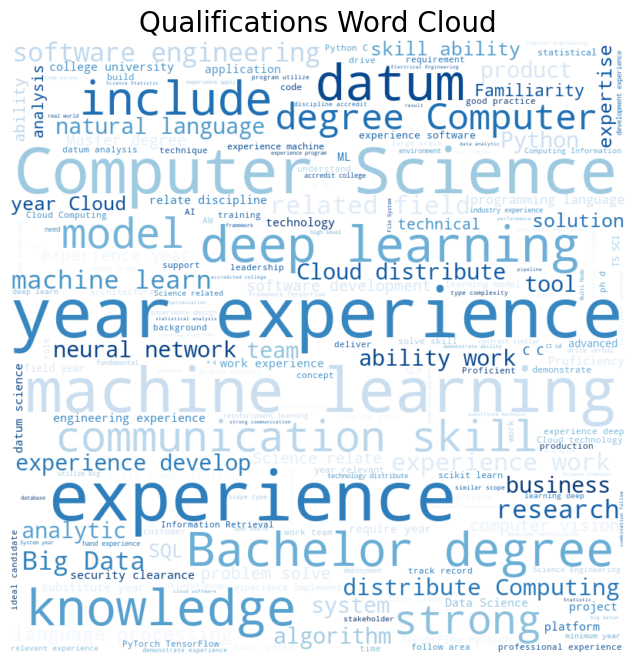

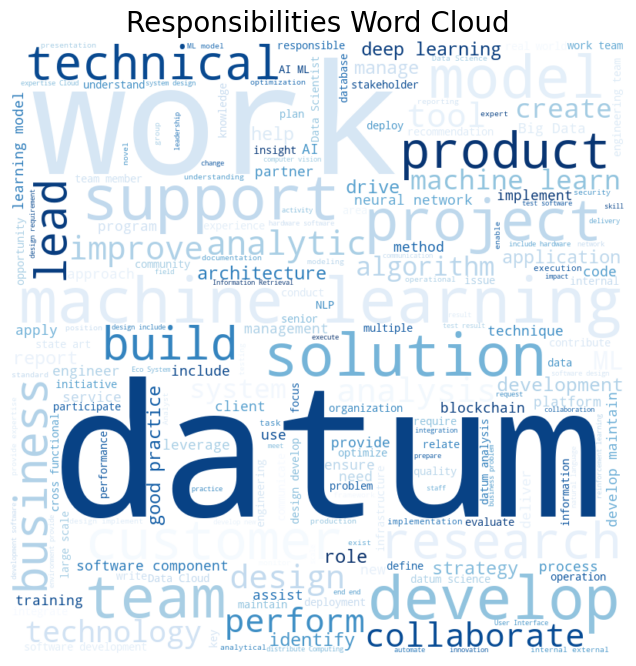

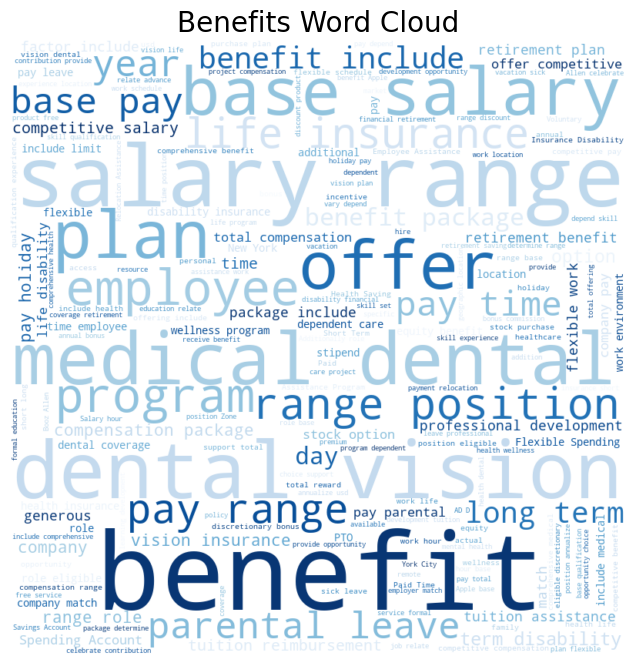

In [23]:
import matplotlib.pyplot as plt

def plot_wordcloud(column_name, title):
    text = " ".join(df_new[column_name])
    wc = WordCloud(width=800, height=800, background_color="white", max_words=200, colormap='Blues').generate(text)
    
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=20)
    plt.show()
    return wc

qualifications_fig = plot_wordcloud("Qualifications_cleaned", "Qualifications Word Cloud")
qualifications_fig.to_file("qualifications.png")
responsibilities_fig = plot_wordcloud("Responsibilities_cleaned", "Responsibilities Word Cloud")
responsibilities_fig.to_file("responsibilities.png")
benefits_fig = plot_wordcloud("Benefits_cleaned", "Benefits Word Cloud")
benefits_fig.to_file("benefits.png")

Now I have three word clouds for the `responsibilities`, `qualifications` and `benefits`. And these plots show some keywords which are very useful.

In [24]:
def job_locater(x):
    try:
        return (x.split(",")[1]).strip()
    except:
        return x.strip()

location_counts = pd.DataFrame(df_new['location'].apply(job_locater).value_counts()[:20]).reset_index()

In [25]:
location_counts

,location,count
0,Anywhere,177
1,CA,131
2,MD,96
3,VA,75
4,NY,46
5,DC,44
6,United States,33
7,MA,25
8,IL,23
9,TX,22


In [26]:
import plotly.express as px

fig2 = px.bar(location_counts, 
             x='location', 
             y='count', 
             title='Distribution of Jobs', 
             labels={'location': 'Location', 'count': 'Value Counts'}, 
             color='count', 
             color_continuous_scale=px.colors.sequential.Blues)

fig2.update_layout(
    autosize=False,
    width=500,
    height=500,
    xaxis=dict(title='Location', tickangle=45),
    yaxis=dict(title='Value Counts'),
    plot_bgcolor='white',
    font=dict(color='black'),
    template="simple_white"
)

fig2.show()


CA stands out for the number of jobs. And MD, VA and DC also rank in front of the locations because of the single search for DC.

In [34]:
import plotly.graph_objs as go
import plotly.express as px

# Calculate the value counts for job_type and WFH_Mentioning
job_type_counts = df_new['job_type'].value_counts()
wfh_mentioning_counts = df_new['WFH_Mentioning'].value_counts()

# Define a function to create a pie chart with LinkedIn blue theme
def create_pie_chart(labels, values, title):
    fig = go.Figure(
        data=[go.Pie(
            labels=labels,
            values=values,
            textinfo='label+percent',
            insidetextorientation='radial',
            marker=dict(colors=px.colors.sequential.Blues_r[1:])
        )]
    )
    
    fig.update_layout(
        title=title,
        font=dict(color='black'),
        template="simple_white",
        width = 500
    )
    
    return fig

# Create pie charts for job_type and WFH_Mentioning
job_type_pie_chart = create_pie_chart(job_type_counts.index, job_type_counts.values, 'Job Type Distribution')
wfh_mentioning_pie_chart = create_pie_chart(wfh_mentioning_counts.index, wfh_mentioning_counts.values, 'WFH Mentioning Distribution')

# Display the pie charts
job_type_pie_chart.show()
wfh_mentioning_pie_chart.show()


Now the two pie charts show the distibution of work from home proportion and job type.

In [28]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('wordnet')

# Preprocessing function
def preprocess_text(text):
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    tokens = [token for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return " ".join(tokens)

# Apply the preprocessing function to the description column
df_new['description_cleaned'] = df_new['description'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zhangxinran/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/zhangxinran/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [29]:
import plotly.graph_objects as go
import plotly.express as px
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

def create_interactive_grouped_bar_chart(df_new, n_topics=5, no_top_words=10):
    keywords = df_new['keyword'].unique()

    # Create the main figure
    fig = go.Figure()

    for keyword in keywords:
        filtered_descriptions = df_new[df_new['keyword'] == keyword]['description_cleaned']
        
        if len(filtered_descriptions) == 0:
            print(f"No descriptions found for keyword: {keyword}")
            continue

        vectorizer = CountVectorizer()
        X = vectorizer.fit_transform(filtered_descriptions)

        lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
        lda.fit(X)

        topic_word_distributions = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]
        top_word_indices = np.argsort(topic_word_distributions, axis=1)[:, -no_top_words:]
        top_words = np.array(vectorizer.get_feature_names_out())[top_word_indices]
        top_word_probs = np.sort(topic_word_distributions, axis=1)[:, -no_top_words:]

        # Create grouped bar chart
        for i in range(n_topics):
            fig.add_trace(go.Bar(
                x=top_words[i],
                y=top_word_probs[i] * 100,  # Convert probabilities to percentages
                name=f'Topic {i+1}',
                visible=(keyword == keywords[0]),
                marker_color=px.colors.qualitative.Plotly[i % len(px.colors.qualitative.Plotly)]
            ))

    # Create dropdown menu
    buttons = [dict(label=keyword, method="update", args=[{"visible": [keyword in col_name for col_name in keywords]}]) for keyword in keywords]

    # Update layout
    fig.update_layout(
        updatemenus=[dict(showactive=True, buttons=buttons)],
        title="Top words in topics",
        xaxis_title="Words",
        xaxis_tickangle=-45,  # Add a slope to the x-axis tick labels
        yaxis_title="Probability (%)",
        hovermode="x unified",
        template="simple_white",
        colorway=px.colors.qualitative.Plotly
    )

    return fig

fig3 = create_interactive_grouped_bar_chart(df_new)
fig3.show()


Now I generate relative topics for each searching keyword. For each keyword, there are some topics and top words.

In [30]:
df_new.head()

,title,company_name,location,via,description,job_highlights,extensions,detected_extensions,keyword,platform,job_type,WFH_Mentioning,Qualifications,Responsibilities,Benefits,Qualifications_cleaned,Responsibilities_cleaned,Benefits_cleaned,description_cleaned
0,Ethereum Blockchain Developer (Remote),Ex Populus,Anywhere,via Built In,Company Overview:\nEx Populus is a cutting-edg...,"[{'title': 'Qualifications', 'items': ['2-3 ye...","[Work from home, Full-time, No degree mentioned]","{'schedule_type': 'Full-time', 'work_from_home...",block-chain,Built In,Full-time,Work from home,2-3 years of Software Development experience 1...,"Design, maintain and deploy smart contracts fo...",,year Software Development experience year soli...,design maintain deploy smart contract video ga...,,company overview ex populus gaming entertainme...
1,Blockchain Engineer,21.co,"New York, NY",via Greenhouse,We are seeking a highly motivated and skilled ...,"[{'title': 'Qualifications', 'items': ['Bachel...",[Full-time],{'schedule_type': 'Full-time'},block-chain,Greenhouse,Full-time,Not Mentioned,Bachelor's or Master's degree in Computer Scie...,"As a Blockchain Engineer, you will be responsi...",(NYC only) Pursuant to Section 8-102 of title ...,Bachelor Master degree Computer Science Engine...,Blockchain Engineer responsible develop smart ...,NYC Pursuant section title New York City admin...,seeking highly motivated skilled blockchain en...
2,Blockchain Course Instructor,Blockchain Institute of Technology,Anywhere,via LinkedIn,"Are you a blockchain, cryptocurrency, NFT, Met...","[{'title': 'Qualifications', 'items': ['3+ yea...","[24 hours ago, Work from home, Contractor, No ...","{'posted_at': '24 hours ago', 'schedule_type':...",block-chain,LinkedIn,Other,Work from home,"3+ years of experience in blockchain, cryptocu...",Our expert technical team will provide the sup...,,year experience blockchain cryptocurrency web ...,expert technical team provide support need hel...,,blockchain cryptocurrency nft metaverse defi w...
3,Python based - Blockchain developer to join ex...,Upwork,Anywhere,via Upwork,Need someone to join our existing team to spee...,"[{'title': 'Qualifications', 'items': ['Candid...","[2 days ago, 10–30 an hour, Work from home, Co...","{'posted_at': '2 days ago', 'schedule_type': '...",block-chain,Upwork,Other,Work from home,"Candidates must be willing to sign, non-disclo...",Will discuss details with the selected candidates,,candidate willing sign non - disclosure non - ...,discuss detail select candidate,,need someone join existing team speed developm...
4,Blockchain DevOps Engineer (Remote),Telnyx,United States,via Startup Jobs,"About Telnyx\n\nAt Telnyx, we’re architecting ...","[{'title': 'Qualifications', 'items': ['You ar...","[4 days ago, Full-time, No degree mentioned]","{'posted_at': '4 days ago', 'schedule_type': '...",block-chain,Startup Jobs,Full-time,Not Mentioned,You are a highly motivated and experienced Blo...,To build a best-in-class Filecoin (FIL) Mining...,,motivated experience Blockchain DevOps Enginee...,build good class Filecoin FIL mining operation...,,telnyx telnyx architecting amplifying access g...


In [39]:
import plotly.io as pio
from jinja2 import Environment, FileSystemLoader

plot1 = pio.to_html(fig1, full_html=False, include_plotlyjs=False)
plot2 = pio.to_html(fig2, full_html=False, include_plotlyjs=False)
plot3 = pio.to_html(job_type_pie_chart, full_html=False, include_plotlyjs=False)
plot4 = pio.to_html(wfh_mentioning_pie_chart, full_html=False, include_plotlyjs=False)
plot5 = pio.to_html(fig3, full_html=False, include_plotlyjs=False)

# Set up the Jinja2 environment and load the template
env = Environment(loader=FileSystemLoader('.'))
template = env.get_template("/website/index.html")

# Render the template with your narratives and Plotly plots
output = template.render(plot1=plot1, plot2=plot2, plot3 = plot3, plot4 = plot4, plot5=plot5)

# Save the rendered template to an HTML file
with open("output.html", "w") as f:
    f.write(output)
